In [ ]:
#Author: Zhou Yujin /Joy
#Student ID:1701213169

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import random
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Loading the data

In [3]:
bankdata=pd.read_csv('bank.csv',sep=';')
#[M,N+1]=bankdata.shape#keep the original num of features
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Data Preprocessing

In [4]:

#Mapping ordinal features
education_map={'unknown':1,'primary':2,'secondary':3,'tertiary':4}
bankdata['education']=bankdata['education'].map(education_map)
job_map={'unknown':1,'student':2,'unemployed':3,'retired':4,'housemaid':5,'services':6,'blue-collar':7,'technician':8,'self-employed':9,'admin.':10,'management':11,'entrepreneur':12}
bankdata['job']=bankdata['job'].map(job_map)
month_map={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
bankdata['month']=bankdata['month'].map(month_map)

#Encoding class labels
this_map={'no':0,'yes':1}
bankdata['default']=bankdata['default'].map(this_map)
bankdata['housing']=bankdata['housing'].map(this_map)
bankdata['loan']=bankdata['loan'].map(this_map)
bankdata['y']=bankdata['y'].map(this_map)

#nominal features
bankdata=pd.get_dummies(bankdata)
bankdata.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,3,2,0,1787,0,0,19,10,79,...,0,1,0,1,0,0,0,0,0,1
1,33,6,3,0,4789,1,1,11,5,220,...,0,1,0,1,0,0,1,0,0,0
2,35,11,4,0,1350,1,0,16,4,185,...,0,0,1,1,0,0,1,0,0,0
3,30,11,4,0,1476,1,1,3,6,199,...,0,1,0,0,0,1,0,0,0,1
4,59,7,3,0,0,1,0,5,5,226,...,0,1,0,0,0,1,0,0,0,1


# Divide into training and test data

In [5]:
from sklearn.cross_validation import train_test_split
#y is the 13th col
a=list(range(24))
a.remove(13)
X, y = bankdata.iloc[:, a].values, bankdata.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm= mms.fit_transform(X_train*1.0)
X_test_norm= mms.transform(X_test*1.0)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Model Test

In [6]:
##Try 8 times to randomly select 3 features and use different model to test.
for tt in range(8):
    choose_f=random.sample(range(16),3)
    if 15 in choose_f:
        choose_f.remove(15)
        choose_f.extend([19,20,21,22])
    elif 14 in choose_f:
        choose_f.remove(14)
        choose_f.extend([16,17,18])
    elif 13 in choose_f:
        choose_f.remove(13)
        choose_f.extend([13,14,15])
    X_train_try=X_train_norm[:,choose_f]
    X_test_try=X_test_norm[:,choose_f]

    #logistic reg
    logis=LogisticRegression()
    logis.fit(X_train_try,y_train)
    y_predl=logis.predict(X_test_try)
    
    print(list(bankdata.columns[a][choose_f]))
    print('Logistic : %.2f' % accuracy_score(y_test, y_predl))

    #svm
    svm = SVC(kernel='linear', C=1.0, random_state=1)
    svm.fit(X_train_try, y_train)
    y_preds=svm.predict(X_test_try)
    print('SVM : %.2f' % accuracy_score(y_test, y_preds))

    #decision tree
    tree = DecisionTreeClassifier(max_depth=4)
    tree.fit(X_train_try, y_train)
    y_predd=tree.predict(X_test_try)
    print('DecisionTree : %.2f' % accuracy_score(y_test, y_predd))
    

['job', 'age', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
Logistic : 0.89
SVM : 0.89
DecisionTree : 0.88
['campaign', 'age', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
Logistic : 0.89
SVM : 0.89
DecisionTree : 0.88
['previous', 'default', 'education']
Logistic : 0.88
SVM : 0.88
DecisionTree : 0.88
['campaign', 'age', 'loan']
Logistic : 0.88
SVM : 0.88
DecisionTree : 0.87
['default', 'job', 'marital_divorced', 'marital_married', 'marital_single']
Logistic : 0.88
SVM : 0.88
DecisionTree : 0.88
['housing', 'balance', 'contact_cellular', 'contact_telephone', 'contact_unknown']
Logistic : 0.88
SVM : 0.88
DecisionTree : 0.88
['marital_divorced', 'age', 'contact_cellular', 'contact_telephone', 'contact_unknown']
Logistic : 0.88
SVM : 0.88
DecisionTree : 0.88
['campaign', 'balance', 'contact_cellular', 'contact_telephone', 'contact_unknown']
Logistic : 0.88
SVM : 0.88
DecisionTree : 0.88


# Plotting

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

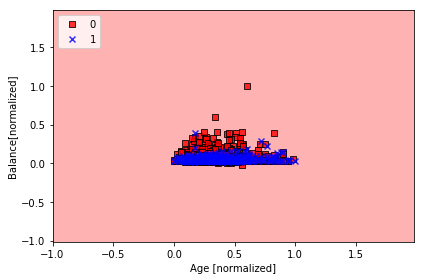

In [8]:
choose_f=[0,4]
Features=list(bankdata.columns[a][choose_f])
X_train_try=X_train_norm[:,choose_f]
X_test_try=X_test_norm[:,choose_f]
X_combined = np.vstack((X_train_try, X_test_try))
y_combined = np.hstack((y_train, y_test))


#SVM Plotting
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_try, y_train)

plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=svm)
plt.xlabel('Age [normalized]')
plt.ylabel('Balance[normalized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

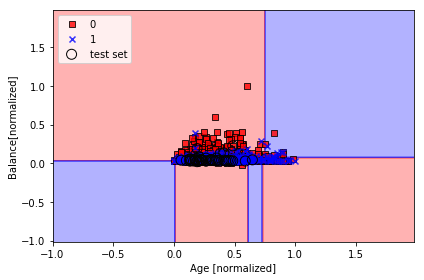

In [10]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train_try, y_train)
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('Age [normalized]')
plt.ylabel('Balance[normalized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

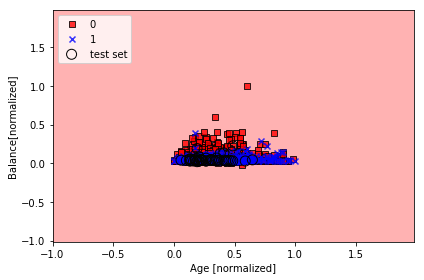

In [9]:
logis=LogisticRegression()
logis.fit(X_train_try,y_train)
plot_decision_regions(X_combined, y_combined, 
                      classifier=logis, test_idx=range(105, 150))

plt.xlabel('Age [normalized]')
plt.ylabel('Balance[normalized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()